<a href="https://colab.research.google.com/github/MananDesai2997/MananDesai2997/blob/main/RexolitePlate_RandomForestClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest Classification

# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

In [2]:
import io
from google.colab import files

In [3]:
uploaded = files.upload()

Saving CLASSIFICATION.csv to CLASSIFICATION.csv


In [4]:
dataset = pd.read_csv(io.BytesIO(uploaded['CLASSIFICATION.csv']))

In [5]:
dataset

,Sequence_Number,Job_Changeover_Proximity,Revision_Group,Week_Number,Suspicious_Unit,SH1_C2_Diameter -14.020,SH1_B5_Diameter -0.220_1,SH1_B5_Diameter -0.220_2,SH1_B5_Diameter -0.160_1,SH1_B5_Diameter -0.160_2,...,SH2_A8_Diameter -0.650_1,SH2_A8_Diameter -0.650_2,SH2_A8_Diameter -0.650_3,SH2_A8_True Position -0.003_1,SH2_A8_True Position -0.003_2,SH2_A8_True Position -0.003_3,SH5 A8_SURFACE FINISH_1,SH5 A4_SURFACE FINISH_2,SH1 B5_DEPTH .100,RCAI_Defect
0,1,0.00000,1,1,1,14.01740,0.22220,0.22240,0.16120,0.16130,...,0.65180,0.65180,0.65180,0.00060,0.00120,0.00120,7.00,7.00,0.101,1
1,2,0.00000,1,2,1,14.01601,0.22146,0.22200,0.16120,0.16115,...,0.65162,0.65170,0.65174,0.00193,0.00085,0.00117,7.00,7.00,0.101,1
2,3,0.01887,1,2,1,14.01594,0.22180,0.22201,0.16120,0.16121,...,0.65170,0.65171,0.65170,0.00119,0.00084,0.00102,7.00,7.00,0.101,0
3,4,0.03774,1,2,1,14.01848,0.22179,0.22190,0.16118,0.16117,...,0.65171,0.65175,0.65175,0.00163,0.00108,0.00104,7.00,7.00,0.101,0
4,5,0.05660,1,2,0,14.01607,0.22183,0.22203,0.16119,0.16112,...,0.65170,0.65169,0.65171,0.00081,0.00083,0.00113,11.27,8.33,0.099,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,415,0.94792,2,23,1,14.01592,0.22124,0.22143,0.16046,0.16046,...,0.65210,0.65210,0.65213,0.00117,0.00039,0.00093,7.00,7.00,0.102,0
407,416,0.95833,2,23,1,14.01756,0.22127,0.22148,0.16046,0.16048,...,0.65213,0.65212,0.65213,0.00228,0.00084,0.00112,7.00,7.00,0.102,1
408,417,0.96875,2,23,1,14.01847,0.22127,0.22146,0.16047,0.16048,...,0.65211,0.65211,0.65213,0.00195,0.00061,0.00136,7.00,7.00,0.103,1
409,418,0.97917,2,23,1,14.01795,0.22128,0.22149,0.16047,0.16049,...,0.65211,0.65211,0.65212,0.00177,0.00077,0.00105,7.00,7.00,0.101,1


In [6]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,47:48].values

In [7]:
print(X)

[[1.0000e+00 0.0000e+00 1.0000e+00 ... 7.0000e+00 7.0000e+00 1.0100e-01]
 [2.0000e+00 0.0000e+00 1.0000e+00 ... 7.0000e+00 7.0000e+00 1.0100e-01]
 [3.0000e+00 1.8870e-02 1.0000e+00 ... 7.0000e+00 7.0000e+00 1.0100e-01]
 ...
 [4.1700e+02 9.6875e-01 2.0000e+00 ... 7.0000e+00 7.0000e+00 1.0300e-01]
 [4.1800e+02 9.7917e-01 2.0000e+00 ... 7.0000e+00 7.0000e+00 1.0100e-01]
 [4.1900e+02 9.8958e-01 2.0000e+00 ... 7.0000e+00 7.0000e+00 1.0200e-01]]


In [8]:
print(Y)

[[1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]


In [9]:
dataset.shape

(411, 48)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Sequence_Number                411 non-null    int64  
 1   Job_Changeover_Proximity       411 non-null    float64
 2   Revision_Group                 411 non-null    int64  
 3   Week_Number                    411 non-null    int64  
 4   Suspicious_Unit                411 non-null    int64  
 5   SH1_C2_Diameter -14.020        411 non-null    float64
 6   SH1_B5_Diameter -0.220_1       411 non-null    float64
 7   SH1_B5_Diameter -0.220_2       411 non-null    float64
 8   SH1_B5_Diameter -0.160_1       411 non-null    float64
 9   SH1_B5_Diameter -0.160_2       411 non-null    float64
 10  SH1_B5_Position -0.005_1       411 non-null    float64
 11  SH1_B5_Position -0.005_2       411 non-null    float64
 12  SH1_B1_Width -0.190            411 non-null    flo

# Taking care of missing data

Impute Missing Values. 

In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(X[:, :])
X[:,:] = imputer.transform(X[:,:])

In [12]:
print(X)

[[1.0000e+00 0.0000e+00 1.0000e+00 ... 7.0000e+00 7.0000e+00 1.0100e-01]
 [2.0000e+00 0.0000e+00 1.0000e+00 ... 7.0000e+00 7.0000e+00 1.0100e-01]
 [3.0000e+00 1.8870e-02 1.0000e+00 ... 7.0000e+00 7.0000e+00 1.0100e-01]
 ...
 [4.1700e+02 9.6875e-01 2.0000e+00 ... 7.0000e+00 7.0000e+00 1.0300e-01]
 [4.1800e+02 9.7917e-01 2.0000e+00 ... 7.0000e+00 7.0000e+00 1.0100e-01]
 [4.1900e+02 9.8958e-01 2.0000e+00 ... 7.0000e+00 7.0000e+00 1.0200e-01]]


In [13]:
print(Y)

[[1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]


Check the percentage of missing values in each variable.

In [14]:
dataset.isnull().sum()/len(dataset)*100

Sequence_Number                  0.0
Job_Changeover_Proximity         0.0
Revision_Group                   0.0
Week_Number                      0.0
Suspicious_Unit                  0.0
SH1_C2_Diameter -14.020          0.0
SH1_B5_Diameter -0.220_1         0.0
SH1_B5_Diameter -0.220_2         0.0
SH1_B5_Diameter -0.160_1         0.0
SH1_B5_Diameter -0.160_2         0.0
SH1_B5_Position -0.005_1         0.0
SH1_B5_Position -0.005_2         0.0
SH1_B1_Width -0.190              0.0
SH1_B1_Distance -0.200           0.0
SH1_B1_Position- 0.002           0.0
SH1_D5_Position -0.005_1         0.0
SH1_D5_Position -0.005_2         0.0
SH1_D5_Position -0.005_3         0.0
SH1_D5_Position -0.005_4         0.0
SH2_D7_Width -0.190              0.0
SH2_D7_Distance -0.20            0.0
SH2_D7_Position- 0.002           0.0
SH2_B1_Position -0.005_1         0.0
SH2_B1_Position -0.005_2         0.0
SH2_B1_Position -0.005_3         0.0
SH2_B1_Position -0.005_4         0.0
SH2_B1_Position -0.005_5         0.0
S

# Splitting the dataset into the Training set and Test set

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [16]:
print(X_train)

[[2.1600e+02 8.5110e-02 2.0000e+00 ... 7.0000e+00 7.0000e+00 1.0000e-01]
 [1.8900e+02 3.7931e-01 2.0000e+00 ... 7.0000e+00 7.0000e+00 1.0100e-01]
 [2.5000e+02 4.4681e-01 2.0000e+00 ... 7.0000e+00 8.0000e+00 1.0000e-01]
 ...
 [1.1800e+02 9.6970e-01 1.0000e+00 ... 9.0000e+00 9.0000e+00 1.0100e-01]
 [4.8000e+01 8.6792e-01 1.0000e+00 ... 9.0000e+00 8.0000e+00 1.0100e-01]
 [1.7500e+02 8.4211e-01 2.0000e+00 ... 8.0000e+00 8.0000e+00 1.0050e-01]]


In [17]:
print(X_test)

[[3.0100e+02 9.7872e-01 2.0000e+00 ... 7.0000e+00 8.0000e+00 1.0050e-01]
 [7.7000e+01 4.0000e-01 1.0000e+00 ... 7.0000e+00 7.0000e+00 1.0000e-01]
 [3.4000e+02 1.9792e-01 2.0000e+00 ... 6.0000e+00 6.0000e+00 1.0050e-01]
 ...
 [3.4200e+02 2.1875e-01 2.0000e+00 ... 6.0000e+00 6.0000e+00 1.0050e-01]
 [5.7000e+01 1.2500e-01 1.0000e+00 ... 1.4000e+01 1.5000e+01 1.0050e-01]
 [9.0000e+00 1.3208e-01 1.0000e+00 ... 8.5000e+00 1.3500e+01 1.0050e-01]]


In [18]:
print(Y_train)

[[1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]


In [19]:
print(Y_test)

[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]]


# Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [21]:
print(X_train)

[[ 0.05867486 -1.42249442  0.70366585 ... -0.30374673 -0.28172279
  -1.32863389]
 [-0.17290565 -0.40843313  0.70366585 ... -0.30374673 -0.28172279
   0.15458191]
 [ 0.35029475 -0.17577121  0.70366585 ... -0.30374673  0.34659223
  -1.32863389]
 ...
 [-0.78187661  1.62654865 -1.42112907 ...  1.05210825  0.97490725
   0.15458191]
 [-1.38227051  1.27572895 -1.42112907 ...  1.05210825  0.34659223
   0.15458191]
 [-0.29298443  1.18676592  0.70366585 ...  0.37418076  0.34659223
  -0.58702599]]


In [22]:
print(X_test)

[[ 0.7877246   1.65763918  0.70366585 ... -0.30374673  0.34659223
  -0.58702599]
 [-1.13353589 -0.33711794 -1.42112907 ... -0.30374673 -0.28172279
  -1.32863389]
 [ 1.12222977 -1.03365603  0.70366585 ... -0.98167422 -0.9100378
  -0.58702599]
 ...
 [ 1.13938388 -0.96185828  0.70366585 ... -0.98167422 -0.9100378
  -0.58702599]
 [-1.30507701 -1.28499984 -1.42112907 ...  4.4417457   4.74479735
  -0.58702599]
 [-1.71677568 -1.26059619 -1.42112907 ...  0.7131445   3.80232482
  -0.58702599]]


Low Variance Filter: Calculate the variance of all the numerical variables

In [23]:
dataset.var()

Sequence_Number                  1.468147e+04
Job_Changeover_Proximity         8.391273e-02
Revision_Group                   2.235713e-01
Week_Number                      4.078641e+01
Suspicious_Unit                  2.227642e-01
SH1_C2_Diameter -14.020          1.260268e-06
SH1_B5_Diameter -0.220_1         5.813237e-08
SH1_B5_Diameter -0.220_2         5.892645e-08
SH1_B5_Diameter -0.160_1         5.090564e-08
SH1_B5_Diameter -0.160_2         4.918251e-08
SH1_B5_Position -0.005_1         2.613605e-07
SH1_B5_Position -0.005_2         2.524300e-07
SH1_B1_Width -0.190              4.696584e-08
SH1_B1_Distance -0.200           5.105814e-07
SH1_B1_Position- 0.002           2.443767e-08
SH1_D5_Position -0.005_1         3.036265e-07
SH1_D5_Position -0.005_2         3.310338e-07
SH1_D5_Position -0.005_3         1.193464e-07
SH1_D5_Position -0.005_4         1.610865e-07
SH2_D7_Width -0.190              4.131752e-08
SH2_D7_Distance -0.20            4.325494e-07
SH2_D7_Position- 0.002           1

# Training the Random Forest model on the Training set

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

# Predicting the Test set results

In [25]:
Y_pred = rf.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


# Making the Confusion Matrix

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
print(accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))
print(cohen_kappa_score(Y_test, Y_pred))

[[87  1]
 [ 3 12]]
0.9611650485436893
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        88
           1       0.92      0.80      0.86        15

    accuracy                           0.96       103
   macro avg       0.94      0.89      0.92       103
weighted avg       0.96      0.96      0.96       103

0.834803528468324


In [28]:
from sklearn.metrics import average_precision_score
average_precision_score(Y_test, Y_pred)

0.7675877520537715

In [29]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, Y_pred)

0.8943181818181818

In [30]:
from sklearn.metrics import zero_one_loss
zero_one_loss(Y_test, Y_pred)

0.03883495145631066

In [31]:
from sklearn.metrics import roc_curve
roc_curve(Y_test, Y_pred)

(array([0.        , 0.01136364, 1.        ]),
 array([0. , 0.8, 1. ]),
 array([2, 1, 0]))

# Prediction Probability Data Matrices

In [32]:
r_probs = [0 for _ in range(len(Y_test))] ##Worst case scenario
rf_probs = rf.predict_proba(X_test)

Probabilities for the positive outcome is kept.

In [33]:
rf_probs = rf_probs[:, 1]

# Computing AUROC and ROC curve values

In [34]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate AUROC

ROC is the receiver operating characteristic AUROC is the area under the ROC curve

In [35]:
r_auc = roc_auc_score(Y_test, r_probs)
rf_auc = roc_auc_score(Y_test, rf_probs)

# Print AUROC scores

In [36]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest Classifier: AUROC = %.3f' % (rf_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest Classifier: AUROC = 0.995


# Calculate ROC curve

In [37]:
r_fpr, r_tpr, _ = roc_curve(Y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(Y_test, rf_probs)

# Plot the ROC curve

In [38]:
import matplotlib.pyplot as plt

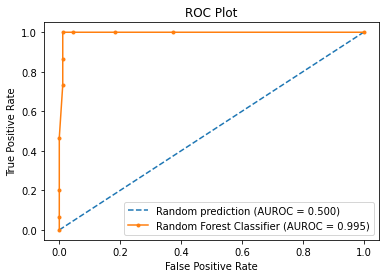

In [39]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest Classifier (AUROC = %0.3f)' % rf_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()